<a href="https://colab.research.google.com/github/Dasika-Vaishnavi/Quantum_AI/blob/main/Deutsch_Jozsa_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Deutsch-Jozsa Algorithm

In this section, we first introduce the Deutsch-Jozsa problem, and classical and quantum algorithms to solve it. We then implement the quantum algorithm using Qiskit, and run it on a simulator and device.

# Introduction

The Deutsch-Jozsa algorithm, first introduced in [David Deutsch and Richard Jozsa (1992). "Rapid solutions of problems by quantum computation". Proceedings of the Royal Society of London A. 439: 553–558](https://royalsocietypublishing.org/doi/10.1098/rspa.1992.0167), was the first example of a quantum algorithm that performs better than the best classical algorithm. It showed that there can be advantages to using a quantum computer as a computational tool for a specific problem.

## Deutsch-Jozsa Problem

We are given a hidden Boolean function $f$, which takes as input a string of bits, and returns either $0$ or $1$, that is:

Screenshot 2023-07-26 at 13-40-10 Deutsch-Jozsa Algorithm.png

The property of the given Boolean function is that it is guaranteed to either be balanced or constant. A constant function returns all $0$'s or all $1$'s for any input, while a balanced function returns $0$'s for exactly half of all inputs and $1$'s for the other half. Our task is to determine whether the given function is balanced or constant.

Note that the Deutsch-Jozsa problem is an $n$-bit extension of the single bit Deutsch problem.

## The Classical Solution

Classically, in the best case, two queries to the oracle can determine if the hidden Boolean function, $f(x)$ , is balanced: e.g. if we get both $f(0,0,0,....) → 0$ and $f(1,0,0,...) → 1$, then we know the function is balanced as we have obtained the two different outputs.

In the worst case, if we continue to see the same output for each input we try, we will have to check exactly half of all possible inputs plus one in order to be certain that $f(x)$ is constant. Since the total number of possible inputs is
$2^n$, this implies that we need $2^{n-1}+1$ trial inputs to be certain that $f(x)$ is constant in the worst case. For example, for a $4$-bit string, if we checked $8$ out of the $16$ possible combinations, getting all $0$'s, it is still possible that the $9$th input returns a $1$ and $f(x)$ is balanced. Probabilistically, this is a very unlikely event. In fact, if we get the same result continually in succession, we can express the probability that the function is constant as a function of $k$ inputs as:


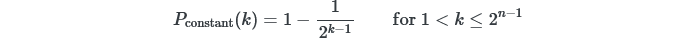

Realistically, we could opt to truncate our classical algorithm early, say if we were over x% confident. But if we want to be 100% confident, we would need to check $2^{n-1}+1$ inputs.

##  Quantum Solution

Using a quantum computer, we can solve this problem with 100% confidence after only one call to the function $f(x)$, provided we have the function $f$ implemented as a quantum oracle, which maps the state $|x⟩|y⟩$ to $|x⟩|y \
\oplus f(x)⟩$, where $\oplus$ is addition modulo $2$. Below is the generic circuit for the Deutsch-Jozsa algorithm.

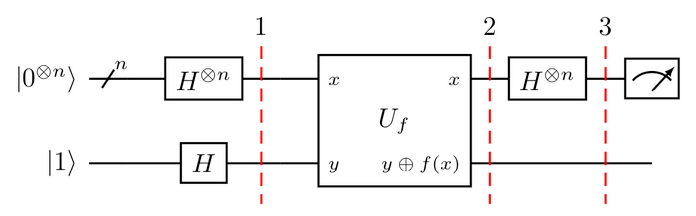

Now, let's go through the steps of the algorithm:

1. Prepare two quantum registers. The first is an $n$-qubit register initialized to $|0⟩$, and the second is a one-qubit register initialized to $|1⟩$:

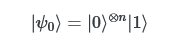

2. Apply a Hadamard gate to each qubit:

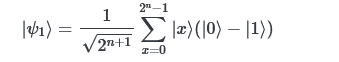

3. Apply the quantum oracle $|x⟩|y⟩$ to $|x⟩|y⊕f(x)⟩$:


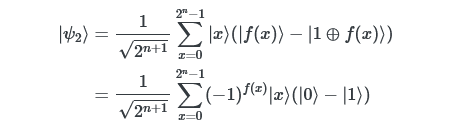

since for each $x,f(x)$ is either $0$ or $1$.

4. At this point the second single qubit register may be ignored. Apply a Hadamard gate to each qubit in the first register:


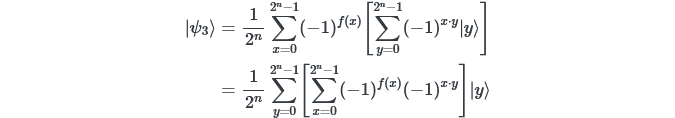

where $x⋅y = x_0 y_0 \oplus x_1 y_1 \oplus ... \oplus x_{n-1}y_{n-1}$ is the sum of the bitwise product.

5. Measure the first register. Notice that the probability of measuring
Screenshot 2023-07-26 at 13-53-49 Deutsch-Jozsa Algorithm.png
, which evaluates to $1$ if $f(x)$ is constant and $0$ if $f(x)$ is balanced.

##Why Does This Work?

<li> Constant Oracle

When the oracle is constant, it has no effect (up to a global phase) on the input qubits, and the quantum states before and after querying the oracle are the same. Since the H-gate is its own inverse, in Step 4 we reverse Step 2 to obtain the initial quantum state of $|00....0⟩$ in the first register.


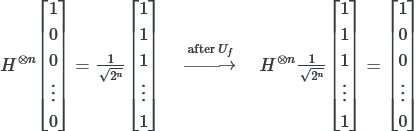

<li> Balanced Oracle

After step 2, our input register is an equal superposition of all the states in the computational basis. When the oracle is balanced, phase kickback adds a negative phase to exactly half these states:

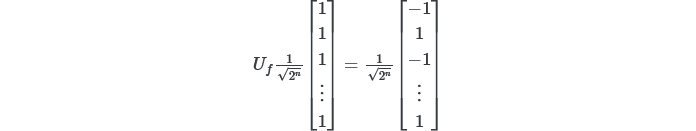


The quantum state after querying the oracle is orthogonal to the quantum state before querying the oracle. Thus, in Step 4, when applying the H-gates, we must end up with a quantum state that is orthogonal to $|00....0⟩$. This means we should never measure the all-zero state.

# Worked Example

Let's go through a specific example for a two bit balanced function:

Consider a two-bit function $f(x_0, x_1) = x_0 \oplus x_1$
such that

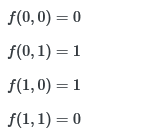


The corresponding phase oracle of this two-bit oralce is
Screenshot 2023-07-26 at 14-00-06 Deutsch-Jozsa Algorithm.png

We will now check if this oracle works as expected by taking a example state

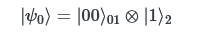

1. The first register of two qubits is initialized to $|00⟩$ and the second register qubit to $|1⟩$

(Note that we are using subscripts 0, 1, and 2 to index the qubits. A subscript of "01" indicates the state of the register containing qubits 0 and 1)

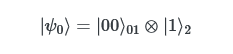


2. Apply Hadamard on all qubits

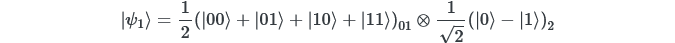

3. The oracle function can be implemented as
Screenshot 2023-07-26 at 14-01-50 Deutsch-Jozsa Algorithm.png

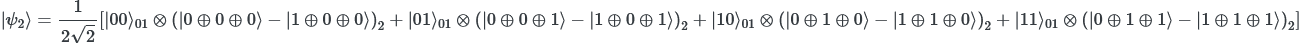

4. Simplifying this, we get the following:

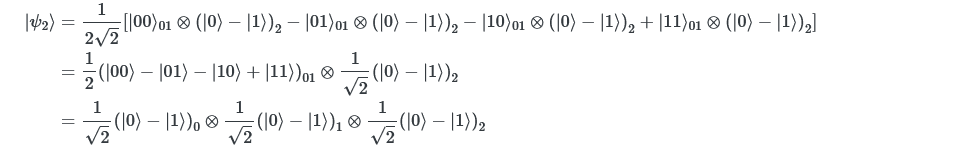

5. Apply Hadamard on the first register

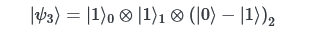

6. Measuring the first two qubits will give the non-zero $11$, indicating a balanced function.

# Creating Quantum Oracles

Let's see some different ways we can create a quantum oracle.

For a constant function, it is simple:

    if f(x) = 0, then apply the I gate to the qubit in register 2.
    if f(x) = 1, then apply the X gate to the qubit in register 2.

For a balanced function, there are many different circuits we can create. One of the ways we can guarantee our circuit is balanced is by performing a CNOT for each qubit in register 1, with the qubit in register 2 as the target. For example:

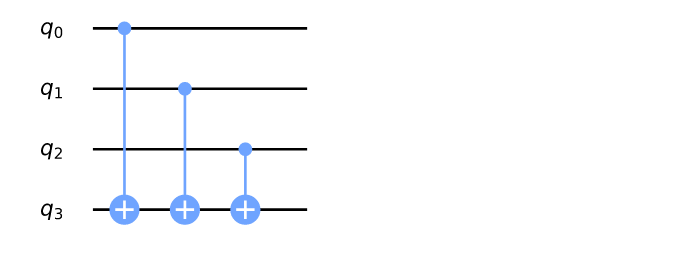

In the image above, the top three qubits form the input register, and the bottom qubit is the output register. We can see which input states give which output in the table below:

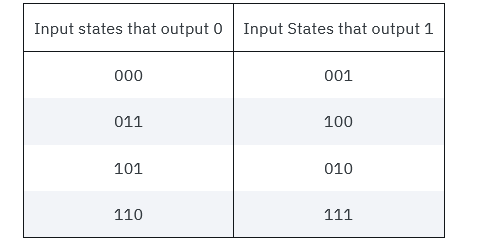

We can change the results while keeping them balanced by wrapping selected controls in X-gates. For example, see the circuit and its results table below:

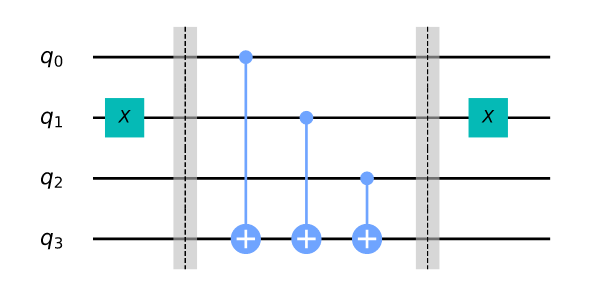

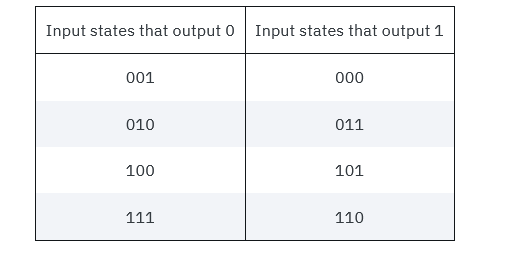

# Qiskit Implementation

We now implement the Deutsch-Jozsa algorithm for the example of a three-bit function, with both constant and balanced oracles. First let's do our imports:

In [ ]:
!pip install qiskit
!pip install qiskit[visualization]
!pip install qiskit[machine-learning]
!pip install qiskit[nature]
!pip install pylatexenc

%pip install matplotlib

import qiskit

qiskit.version.get_version_info()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=2b03aaa90abb27d9c618c842236f738a764a42bae542844c80eae3447d2da2a5
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


'1.3.1'

In [ ]:
# initialization
import numpy as np

# importing Qiskit

from qiskit import QuantumCircuit, transpile
from qiskit.primitives import Sampler, Estimator

# import basic plot tools
from qiskit.visualization import plot_histogram

Next, we set the size of the input register for our oracle:

In [ ]:
# set the length of the n-bit input string.
n = 3

## Constant Oracle

Let's start by creating a constant oracle, in this case the input has no effect on the output so we just randomly set the output qubit to be 0 or 1:

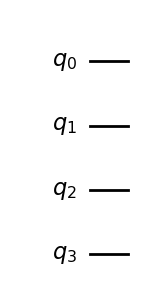

In [ ]:
# Set the length of the n-bit input string
n = 3

# Create a constant oracle circuit with n input qubits and 1 output qubit
const_oracle = QuantumCircuit(n + 1)

# Randomly decide the output of the constant oracle (0 or 1)
output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)  # Apply X gate to the output qubit if the output is 1

# Draw the circuit using matplotlib
const_oracle.draw('mpl')

### Balanced Oracle



In [ ]:
balanced_oracle = QuantumCircuit(n+1)

Next, we create a balanced oracle. As we saw in section 1b, we can create a balanced oracle by performing CNOTs with each input qubit as a control and the output bit as the target. We can vary the input states that give 0 or 1 by wrapping some of the controls in X-gates. Let's first choose a binary string of length n that dictates which controls to wrap:

In [ ]:
b_str = "101"

Now we have this string, we can use it as a key to place our X-gates. For each qubit in our circuit, we place an X-gate if the corresponding digit in b_str is 1, or do nothing if the digit is 0.

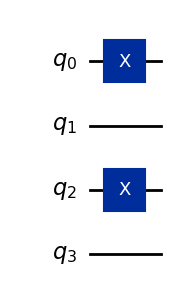

In [ ]:
import matplotlib.pyplot as plt
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.draw('mpl')

Next, we do our controlled-NOT gates, using each input qubit as a control, and the output qubit as a target:

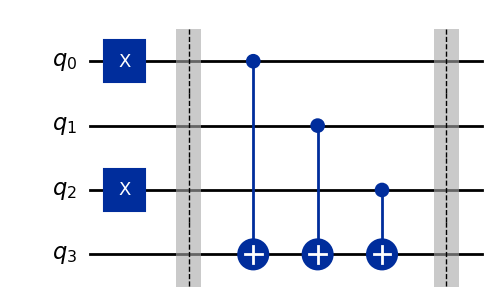

In [ ]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()
balanced_oracle.draw('mpl')

Finally, we repeat the code from two cells up to finish wrapping the controls in X-gates:

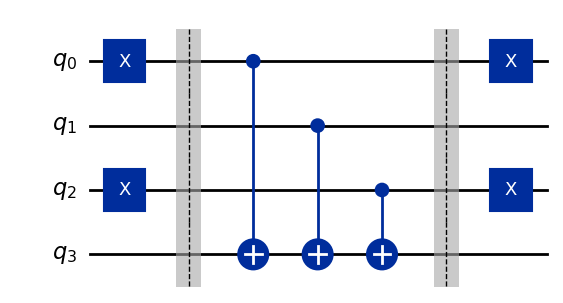

In [ ]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw('mpl')

We have just created a balanced oracle! All that's left to do is see if the Deutsch-Jozsa algorithm can solve it.

# The Full Algorithm

Let's now put everything together. This first step in the algorithm is to initialize the input qubits in the state $|+⟩$ and the output qubit in the state $|-⟩$

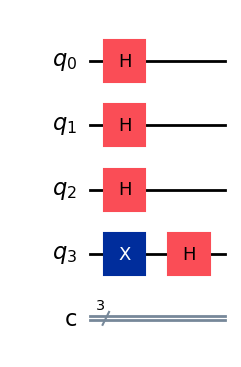

In [ ]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.draw('mpl')

Next, let's apply the oracle. Here we apply the balanced_oracle we created above:

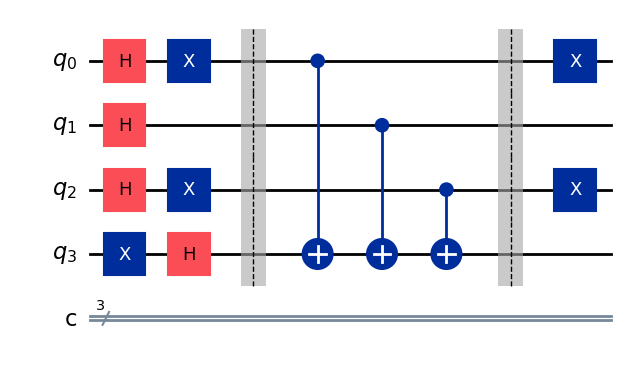

In [ ]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit = dj_circuit.compose(balanced_oracle)
dj_circuit.draw('mpl')

Finally, we perform H-gates on the $n$-input qubits, and measure our input register:

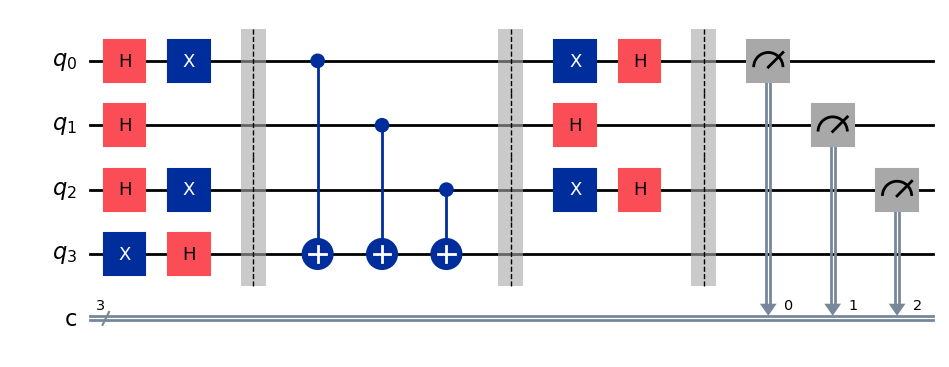

In [ ]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit = dj_circuit.compose(balanced_oracle)

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw('mpl')

Let's see the output:

<ipython-input-13-fb8890587304>:3: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


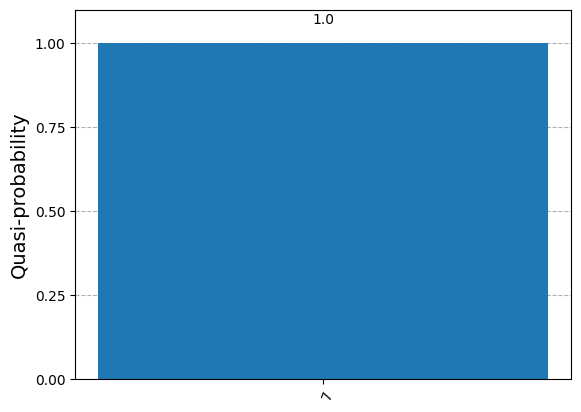

In [ ]:
# use local simulator

sampler = Sampler()
result = sampler.run(dj_circuit).result()
answer = result.quasi_dists[0]

plot_histogram(answer)

We can see from the results above that we have a 0% chance of measuring 000. This correctly predicts the function is balanced.

### Generalised Circuits

Below, we provide a generalised function that creates Deutsch-Jozsa oracles and turns them into quantum gates. It takes the case, (either 'balanced' or 'constant', and n, the size of the input register:

In [ ]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)

    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)

    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

Let's also create a function that takes this oracle gate and performs the Deutsch-Jozsa algorithm on it:

In [ ]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)

    for i in range(n):
        dj_circuit.measure(i, i)

    return dj_circuit

Finally, let's use these functions to play around with the algorithm:

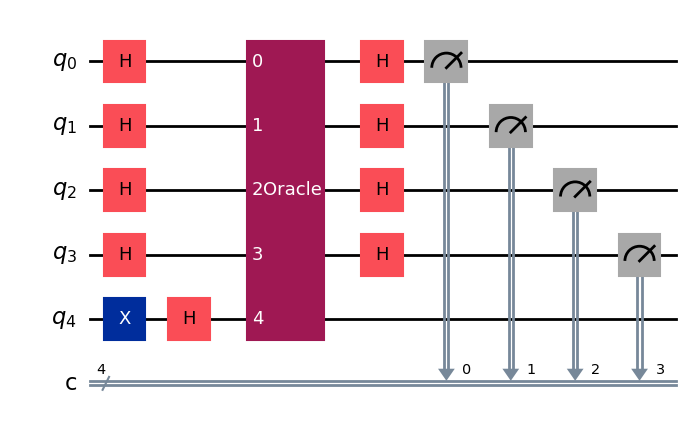

In [ ]:
n = 4
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw('mpl')

And see the results of running this circuit:

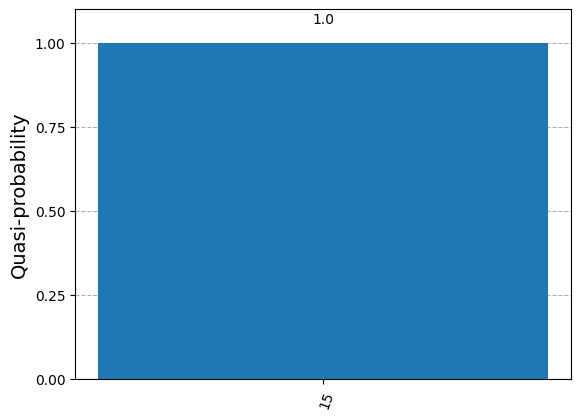

In [ ]:
result = sampler.run(dj_circuit).result()
answer = result.quasi_dists[0]
plot_histogram(answer)

# Experiment with Real Devices

We can run the circuit on the real device as shown below. We first look for the least-busy device that can handle our circuit.

In [ ]:
# from qiskit_ibm_runtime import QiskitRuntimeService

# # Save an IBM Quantum account and set it as your default account.
# QiskitRuntimeService.save_account(channel="ibm_quantum", token="<Enter Your Token Here>", overwrite=True)

# # Load saved credentials
# service = QiskitRuntimeService()

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>,
 <IBMBackend('ibm_sherbrooke')>]

In [ ]:
service = QiskitRuntimeService()
backend = service.least_busy(operational=True,min_num_qubits=5)
print(backend)

<IBMBackend('ibm_kyoto')>


In [ ]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager


pm = generate_preset_pass_manager(optimization_level=3, backend=backend,seed_transpiler=11)

qc = pm.run(dj_circuit)


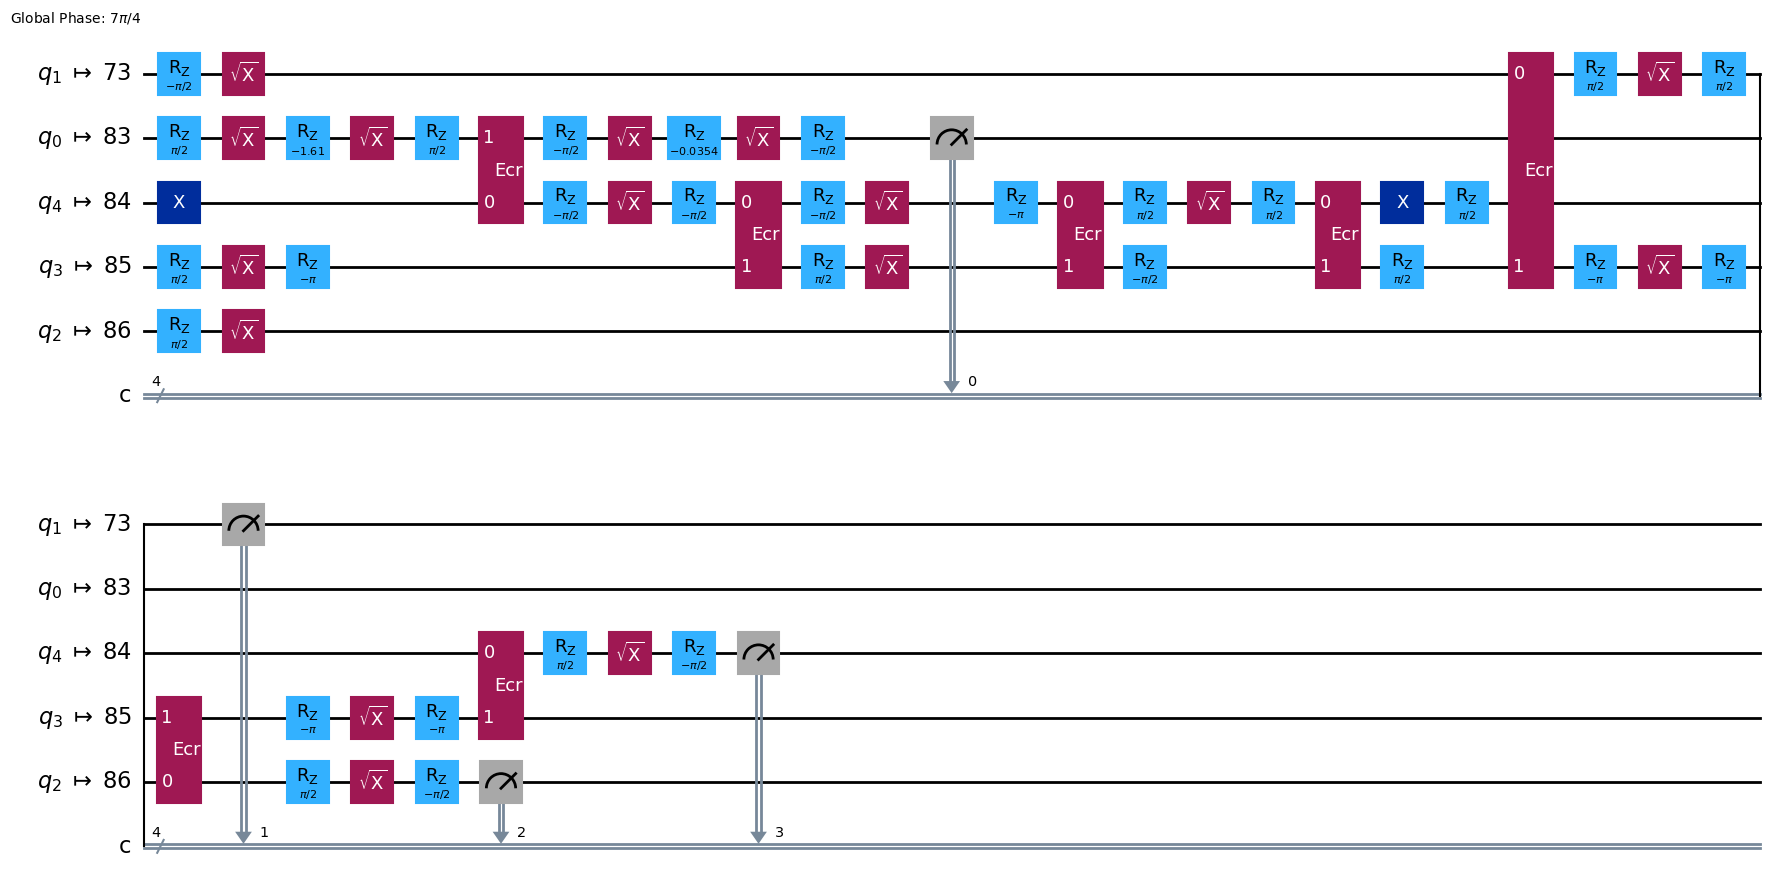

In [ ]:
qc.draw('mpl',idle_wires=False)

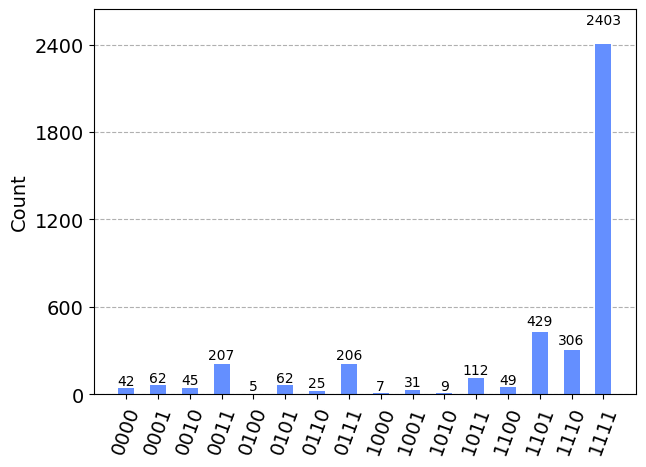

In [ ]:
# Get the results of the computation
from qiskit.primitives import BackendSampler

sampler = BackendSampler(backend)

result = sampler.run(qc).result()
answer = result.quasi_dists[0]


plot_histogram(answer)

As we can see, the most likely result is 1111. The other results are due to errors in the quantum computation